#### Import the required libraries we need for the lab.

In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-488f625fa84a>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#### Read the dataset in the csv file from the URL
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

df=pd.read_csv(boston_url)
# Display the first few rows of the dataset
df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Task 2: Generate Descriptive Statistics and Visualizations

Boxplot for Median Value of Owner-Occupied Homes (MEDV)


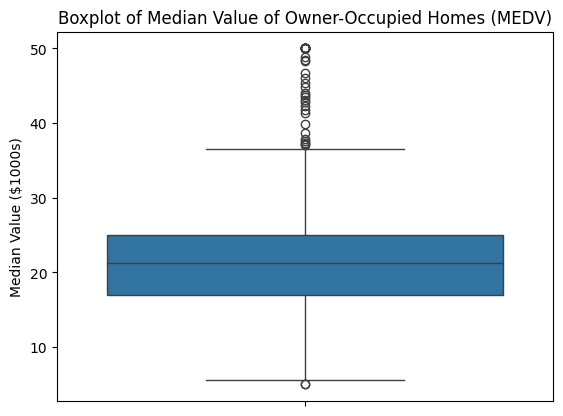

In [6]:
# Boxplot for MEDV
sns.boxplot(y='MEDV', data=df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

Bar Plot for the Charles River Variable (CHAS):

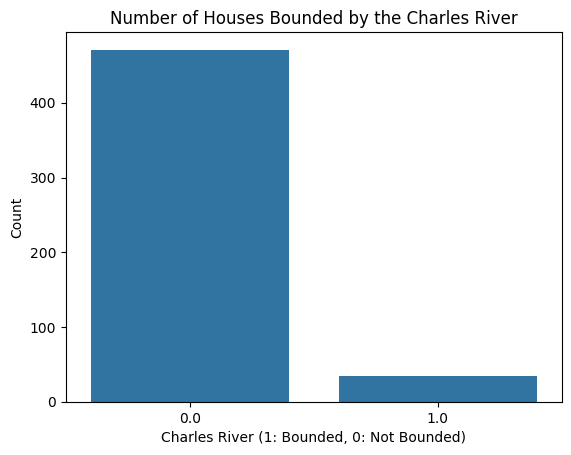

In [7]:
# Bar plot for CHAS
sns.countplot(x='CHAS', data=df)
pyplot.title('Number of Houses Bounded by the Charles River')
pyplot.xlabel('Charles River (1: Bounded, 0: Not Bounded)')
pyplot.ylabel('Count')
pyplot.show()

Boxplot for MEDV vs. AGE (Discretized):

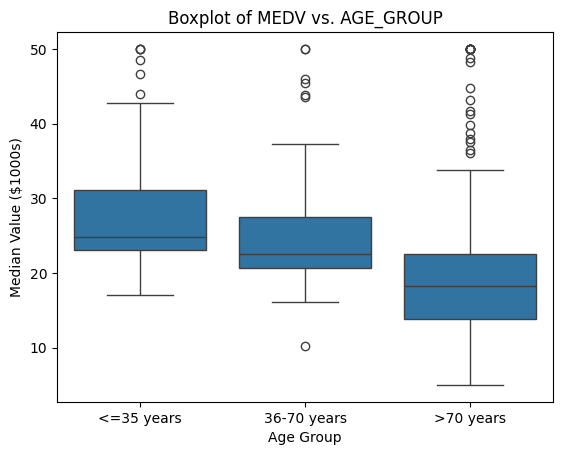

In [8]:
# Discretize AGE into categories
bins = [0, 35, 70, 100]
labels = ['<=35 years', '36-70 years', '>70 years']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs. AGE_GROUP
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
pyplot.title('Boxplot of MEDV vs. AGE_GROUP')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

Scatter Plot for NOX vs. INDUS:

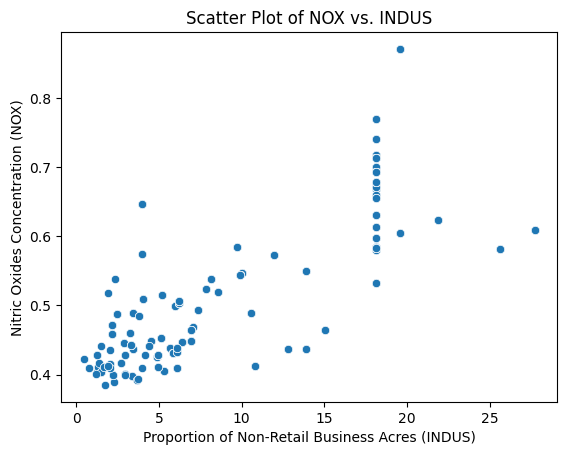

In [9]:
# Scatter plot for NOX vs. INDUS
sns.scatterplot(x='INDUS', y='NOX', data=df)
pyplot.title('Scatter Plot of NOX vs. INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')
pyplot.show()

Histogram for Pupil-Teacher Ratio (PTRATIO):

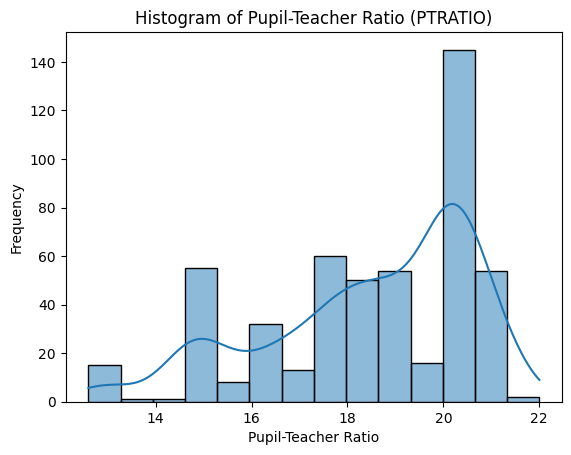

In [10]:
# Histogram for PTRATIO
sns.histplot(df['PTRATIO'], kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### Task 3: Perform Statistical Tests
T-test for CHAS and MEDV:

In [11]:
# T-test for CHAS and MEDV
chas0 = df[df['CHAS'] == 0]['MEDV']
chas1 = df[df['CHAS'] == 1]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(chas0, chas1)

print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')

T-test: t-statistic = -3.996437466090509, p-value = 7.390623170519905e-05


ANOVA for AGE and MEDV:

In [12]:
# ANOVA for AGE_GROUP and MEDV
anova_model = ols('MEDV ~ C(AGE_GROUP)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


Pearson Correlation for NOX and INDUS:

In [13]:
# Pearson Correlation for NOX and INDUS
corr, p_value = scipy.stats.pearsonr(df['NOX'], df['INDUS'])

print(f'Pearson Correlation: correlation = {corr}, p-value = {p_value}')

Pearson Correlation: correlation = 0.7636514469209192, p-value = 7.913361061210442e-98


Regression Analysis for DIS and MEDV:

In [14]:
# Regression Analysis for DIS and MEDV
regression_model = ols('MEDV ~ DIS', data=df).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        12:07:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

# CONCLUSIONS

Boxplot for the Median Value of Owner-Occupied Homes (MEDV)

The boxplot for the MEDV shows that the median value of owner-occupied homes is around 21,000, with a significant number of homes having values below 25,000. There are also some outliers with much higher median values .
Bar Plot for the Charles River Variable (CHAS)


The bar plot for CHAS indicates that most homes in the dataset are not bounded by the Charles River. Only a small proportion of homes are bounded by the river (CHAS = 1), which suggests that the river's proximity might be a unique feature for certain properties .
Boxplot for MEDV vs. AGE

The boxplot for MEDV vs. AGE, where AGE is discretized into three categories (≤35 years, 36-70 years, and >70 years), shows that homes with an older AGE tend to have lower median values. Homes in the youngest AGE group (≤35 years) generally have the highest median values, indicating that newer homes are valued higher .
Scatter Plot for NOX vs. INDUS

The scatter plot for NOX vs. INDUS reveals a positive correlation between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). This suggests that areas with more industrial activity have higher levels of pollution .
Histogram for Pupil-Teacher Ratio (PTRATIO)

The histogram for the pupil-teacher ratio (PTRATIO) shows a right-skewed distribution, with most towns having a PTRATIO between 16 and 20. This indicates that the majority of towns have a relatively high ratio, possibly suggesting larger class sizes .
These visualizations provide a clear understanding of the key characteristics of the housing data and their relationships with various factors in Boston.